# Import file and Library



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pyyaml==5.4.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


import datetime
from datetime import datetime

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor

In [ ]:
pathTrain = "/content/drive/MyDrive/dataSet/bike-sharing-demand/train.csv"
pathTest = "/content/drive/MyDrive/dataSet/bike-sharing-demand/test.csv"
dfTr = pd.read_csv(pathTrain)
dfTs = pd.read_csv(pathTest)
dfTr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
total = len(dfTr)+ len(dfTs)
per = round(len(dfTr)/total * 100 ,2)
print(f"Number of train data is {len(dfTr)}, and Number of test is {len(dfTs)}, so {per} are used to develop ML")

Number of train data is 10886, and Number of test is 6493, so 62.64 are used to develop ML


# Exploratory Data Analysis (EDA)

## Data understanding

In [ ]:
dfTr.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

it does not have any null data

In [ ]:
dfTr.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
dfTr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
dfTr["season"].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

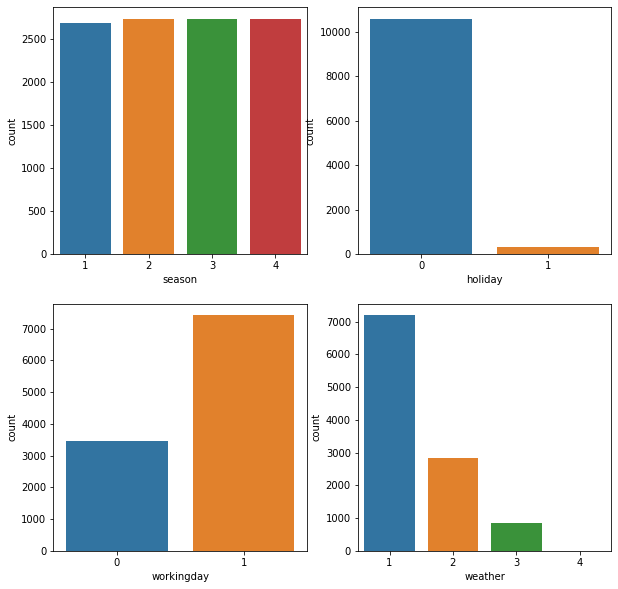

In [ ]:
figCat , axs = plt.subplots(2,2,figsize=(10,10))

sns.countplot(dfTr["season"], ax= axs[0,0])
sns.countplot(dfTr["holiday"], ax= axs[0,1])
sns.countplot(dfTr["workingday"], ax= axs[1,0])
sns.countplot(dfTr["weather"], ax= axs[1,1])

### Adding new columns

In [ ]:
dfTr['date'] = pd.to_datetime(dfTr['datetime']).dt.date
dfTr['time'] = pd.to_datetime(dfTr['datetime']).dt.time


dfTs['date'] = pd.to_datetime(dfTs['datetime']).dt.date
dfTs['time'] = pd.to_datetime(dfTs['datetime']).dt.time
# dfTs.head(2)
dfTr.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00


In [ ]:
pd.to_datetime(dfTr["date"]).dt.year
pd.to_datetime(dfTr["date"]).dt.week
pd.to_datetime(dfTr["date"]).dt.month
pd.to_datetime(dfTr["date"]).dt.weekday
# pd.to_datetime(dfTr["date"]).dt.day_name()
pd.to_datetime(dfTr["datetime"]).dt.hour.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: datetime, dtype: int64

#### Year

In [ ]:
print("Train data in year:\n",pd.to_datetime(dfTr["date"]).dt.year.value_counts())
print("-------")
print("Test data in year :\n",pd.to_datetime(dfTs["date"]).dt.year.value_counts())

Train data in year:
 2012    5464
2011    5422
Name: date, dtype: int64
-------
Test data in year :
 2012    3270
2011    3223
Name: date, dtype: int64


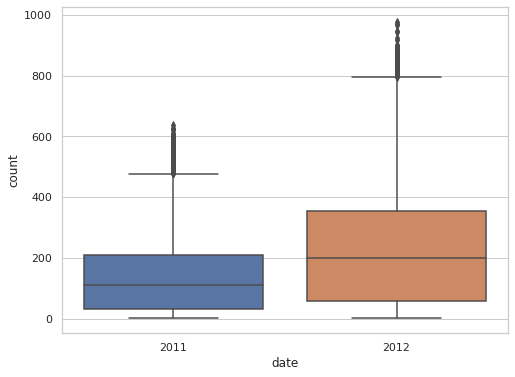

In [ ]:
plt.figure(figsize = (8,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=pd.to_datetime(dfTr["date"]).dt.year,y=dfTr["count"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


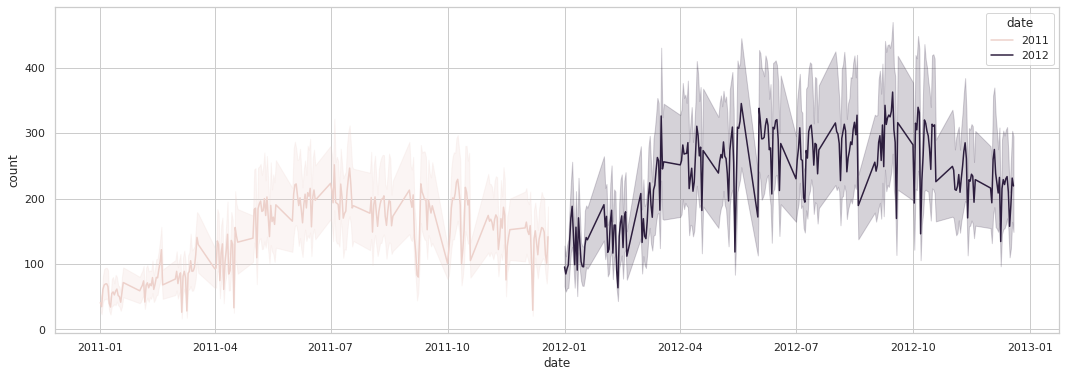

In [ ]:
plt.figure(figsize = (18,6))

sns.set_context('talk')
sns.set(style='whitegrid')
sns.lineplot(dfTr['date'],dfTr["count"],hue=pd.to_datetime(dfTr["date"]).dt.year)

#plt.savefig(pathSaveSand+"scatterCohesion.png",dpi=300)
plt.show()


From these plots(Box plot and lineplot) I can find out Year has a relation to the count, so we can assume one column for year

#### Time

In [ ]:
print("Train data in hour:\n",pd.to_datetime(dfTr["datetime"]).dt.hour.value_counts())
print("-------")
print("Test data in hour :\n",pd.to_datetime(dfTr["datetime"]).dt.hour.value_counts())

Train data in hour:
 12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: datetime, dtype: int64
-------
Test data in hour :
 12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: datetime, dtype: int64


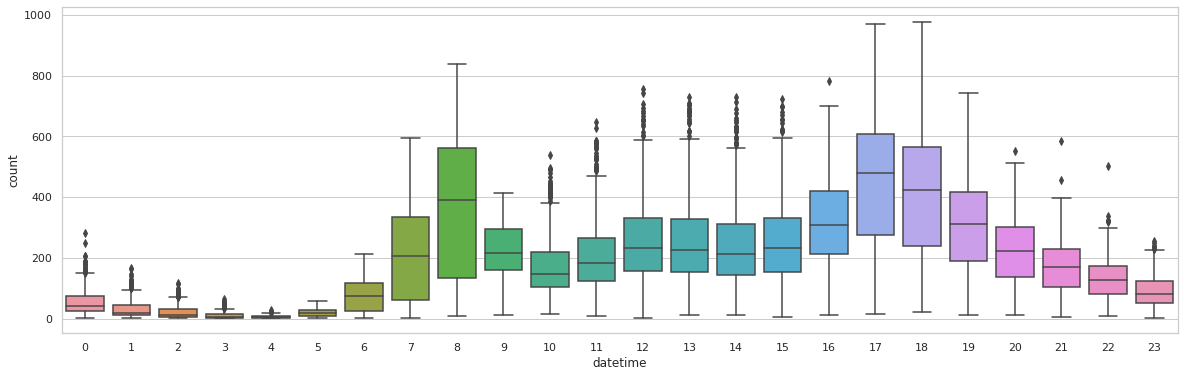

In [ ]:
plt.figure(figsize = (20,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=pd.to_datetime(dfTr["datetime"]).dt.hour,y=dfTr["count"])

#### month

In [ ]:
print("Train data in month:\n",pd.to_datetime(dfTr["datetime"]).dt.month.value_counts())
print("-------")
print("Test data in month :\n",pd.to_datetime(dfTr["datetime"]).dt.month.value_counts())

Train data in month:
 5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: datetime, dtype: int64
-------
Test data in month :
 5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: datetime, dtype: int64


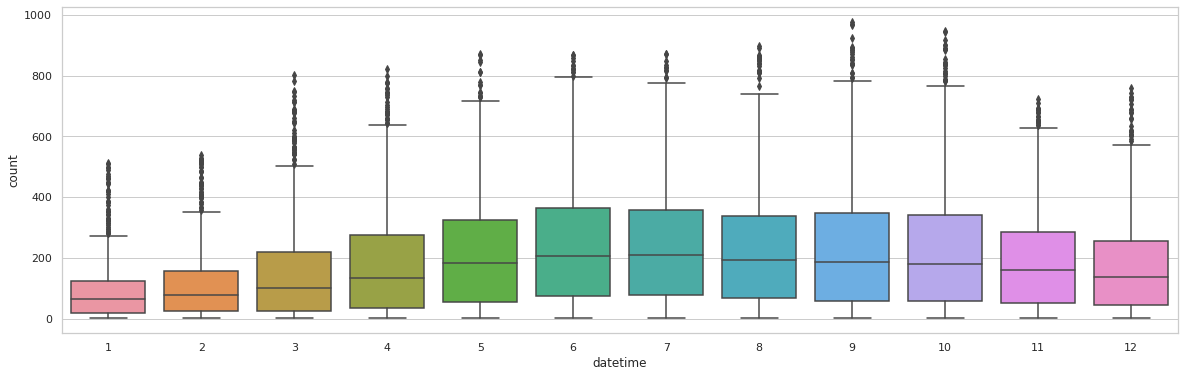

In [ ]:
plt.figure(figsize = (20,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=pd.to_datetime(dfTr["datetime"]).dt.month,y=dfTr["count"])

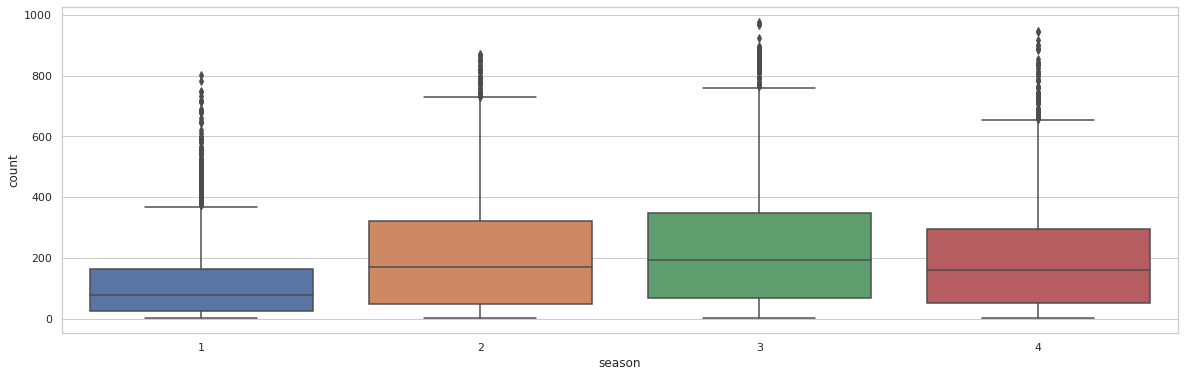

In [ ]:
plt.figure(figsize = (20,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=dfTr.season,y=dfTr["count"])

In my Idea Month shows the Season and I will add Month and remove season from Studying data. Also, the Year and Time will be added into the new dataset.

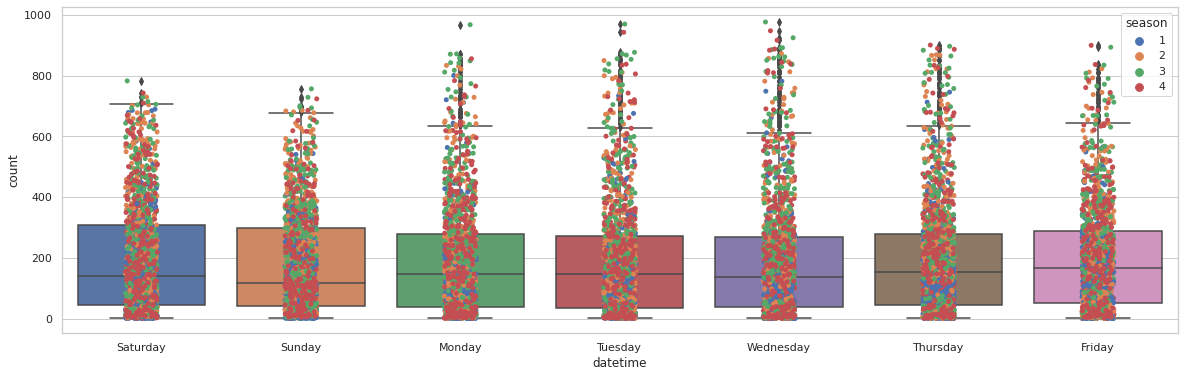

In [ ]:
pd.to_datetime(dfTr["datetime"]).dt.day_name().value_counts()
plt.figure(figsize = (20,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=pd.to_datetime(dfTr["datetime"]).dt.day_name() ,y=dfTr["count"])
sns.stripplot(x=pd.to_datetime(dfTr["datetime"]).dt.day_name() ,y=dfTr["count"] ,hue=dfTr["season"])


In [ ]:
dfTr['year'] = pd.to_datetime(dfTr['datetime']).dt.year
dfTr['hour'] = pd.to_datetime(dfTr['datetime']).dt.hour
dfTr['month'] = pd.to_datetime(dfTr['datetime']).dt.month

dfTs['year'] = pd.to_datetime(dfTs['datetime']).dt.year
dfTs['hour'] = pd.to_datetime(dfTs['datetime']).dt.hour
dfTs['month'] = pd.to_datetime(dfTs['datetime']).dt.month
# dfTs.head(2)
dfTr.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,2011,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,2011,1,1


### Focuse on categorical data

In [ ]:
def countValue(data):
  SS = data.value_counts()
  return print(SS,"\n")

countValue(dfTr["season"])
countValue(dfTr["holiday"])
countValue(dfTr["workingday"])
countValue(dfTr["weather"])
countValue(dfTr["year"])
countValue(dfTr["hour"])
countValue(dfTr["month"])

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64 

0    10575
1      311
Name: holiday, dtype: int64 

1    7412
0    3474
Name: workingday, dtype: int64 

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64 

2012    5464
2011    5422
Name: year, dtype: int64 

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64 

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64 



This is general, so the number of season is balance, but the number of holiday is not, which looks right. <br>
- But has to be assumed, the number of Bikes are related to the holiday or not?
- How is the relation Working day and Bikes?
- The number of Bike in that unit weather was how much? was it snowy? And relation Bike Vs weather


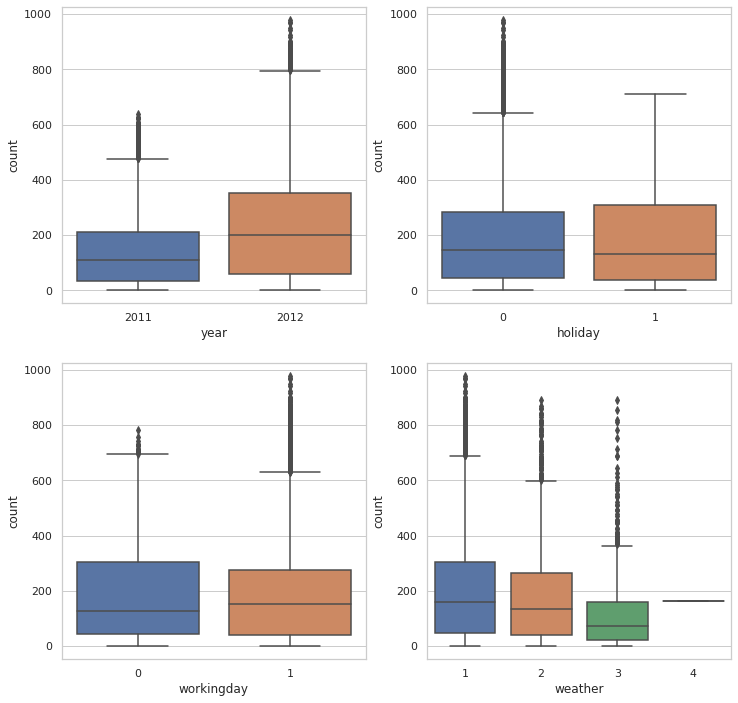

In [ ]:
figCatCount , axs = plt.subplots(2,2,figsize=(12,12))

sns.boxplot(x="year",y="count", data=dfTr, ax=axs[0,0])
sns.boxplot(x="holiday",y="count", data=dfTr, ax=axs[0,1])
sns.boxplot(x="workingday",y="count", data=dfTr, ax=axs[1,0])
sns.boxplot(x="weather",y="count", data=dfTr, ax=axs[1,1])

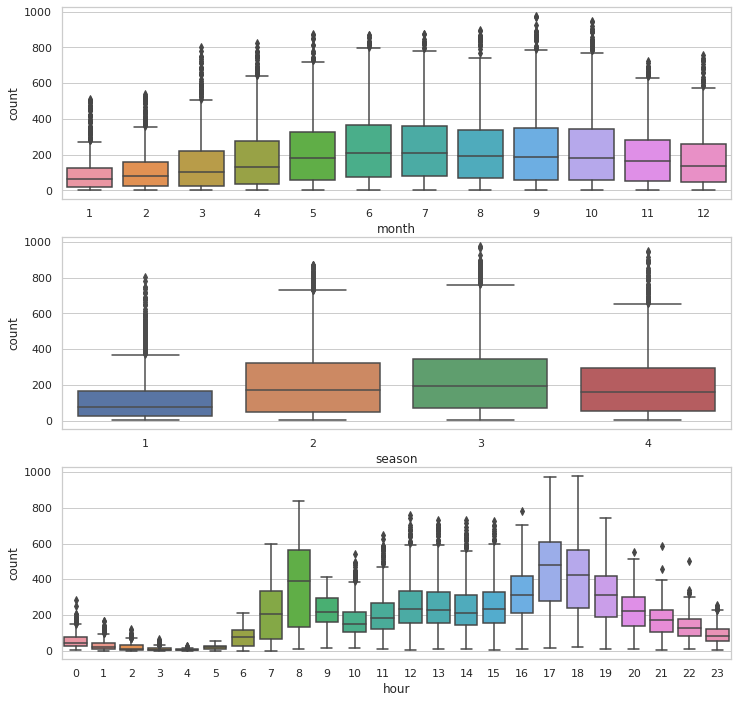

In [ ]:
figCatCount2, axs = plt.subplots(3,1,figsize=(12,12))

sns.boxplot(x="month",y="count", data=dfTr, ax=axs[0])
sns.boxplot(x="hour",y="count", data=dfTr, ax=axs[2])
sns.boxplot(x="season",y="count", data=dfTr, ax=axs[1])

### Pair plot

In [ ]:
#sns.pairplot(dfTr, hue="workingday")

### Focus on continuous data

In [ ]:
df = px.data.tips()
fig = px.scatter(dfTr, x="registered", y="count", color="season", facet_col="workingday", facet_row="holiday")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(dfTr, x="casual", y="count", color="season", facet_col="workingday", facet_row="holiday")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(dfTr, x="casual", y="count", color="windspeed", facet_col="workingday", facet_row="holiday")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(dfTr, x="temp", y="count", color="weather", facet_col="workingday", facet_row="holiday")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(dfTr, x="hour", y="count", color="year", facet_col="workingday", facet_row="holiday")
fig.show()

### interactive plots

In [ ]:
# import plotly.express as px

df = px.data.tips()

fig = px.box(dfTr, x="holiday", y="count", color="workingday")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
df = px.data.tips()

fig = px.box(dfTr, x="month", y="count", color="weather")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
dfTr[dfTr["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year,hour,month
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012-01-09,18:00:00,2012,18,1


In [ ]:
dfTr.iloc[:,5:].describe()

,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,11.541613,6.521495
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,6.915838,3.444373
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,6.000000,4.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,12.000000,7.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,18.000000,10.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,23.000000,12.000000


In [ ]:
fig = px.scatter(dfTr, x="temp", y="count", trendline="ols", facet_row="weather")
fig.show()

In [ ]:
fig = px.box(dfTr, x="weather", y="count")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

### lineplots for continuous data

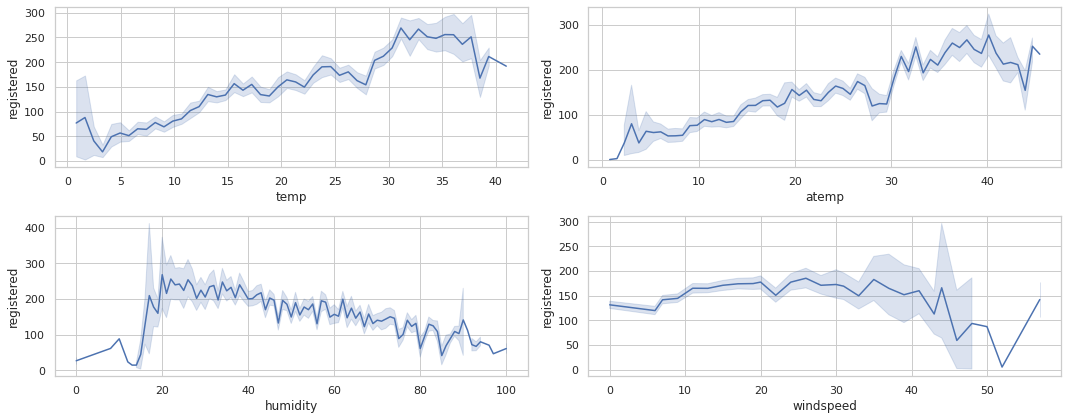

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))
sns.lineplot(y=dfTr['registered'], x=dfTr['temp'], ax=axes[0,0])
sns.lineplot(y=dfTr['registered'], x=dfTr['atemp'], ax=axes[0,1])
sns.lineplot(y=dfTr['registered'], x=dfTr['humidity'], ax=axes[1,0])
sns.lineplot(y=dfTr['registered'], x=dfTr['windspeed'], ax=axes[1,1])

fig.tight_layout()

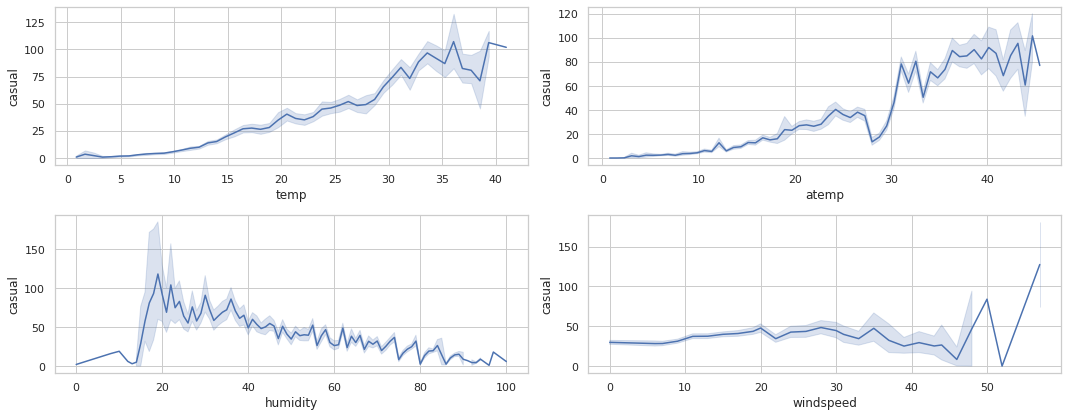

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))
sns.lineplot(y=dfTr['casual'], x=dfTr['temp'], ax=axes[0,0])
sns.lineplot(y=dfTr['casual'], x=dfTr['atemp'], ax=axes[0,1])
sns.lineplot(y=dfTr['casual'], x=dfTr['humidity'], ax=axes[1,0])
sns.lineplot(y=dfTr['casual'], x=dfTr['windspeed'], ax=axes[1,1])

fig.tight_layout()

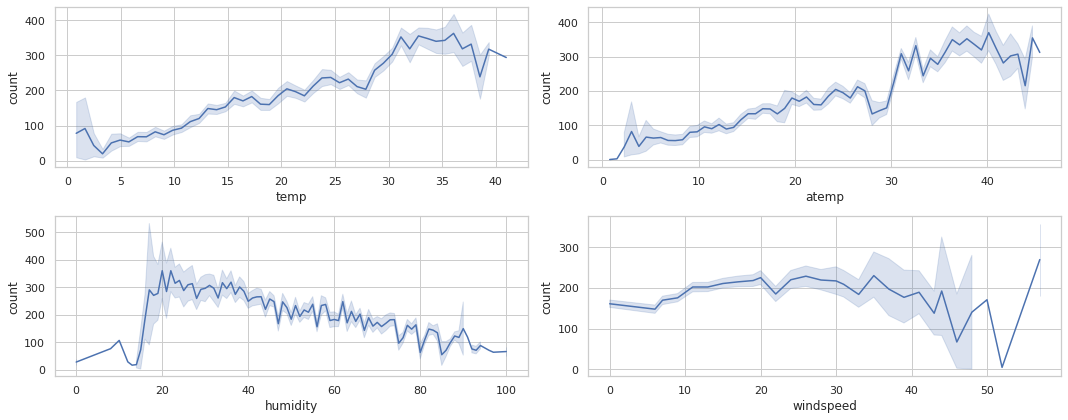

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))
sns.lineplot(y=dfTr['count'], x=dfTr['temp'], ax=axes[0,0])
sns.lineplot(y=dfTr['count'], x=dfTr['atemp'], ax=axes[0,1])
sns.lineplot(y=dfTr['count'], x=dfTr['humidity'], ax=axes[1,0])
sns.lineplot(y=dfTr['count'], x=dfTr['windspeed'], ax=axes[1,1])

fig.tight_layout()

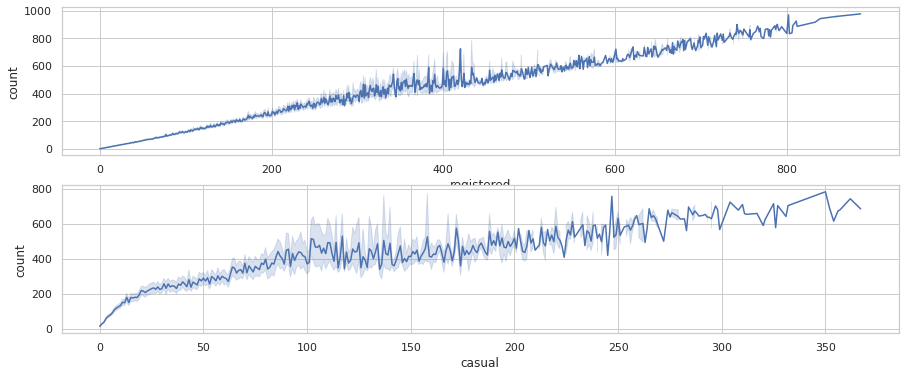

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,6))
sns.lineplot(y=dfTr['count'], x=dfTr['casual'], ax=axes[1])
sns.lineplot(y=dfTr['count'], x=dfTr['registered'], ax=axes[0])

### corelation matrix

In [ ]:
dropColumn = ["datetime","date","time","registered", "casual"]
df_train = dfTr.drop(dropColumn, axis=1)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,hour,month
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,0,1
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,2,1
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,3,1
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,4,1


In [ ]:
df_test = dfTs.drop(dropColumn[:3], axis=1)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,1
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,1
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1


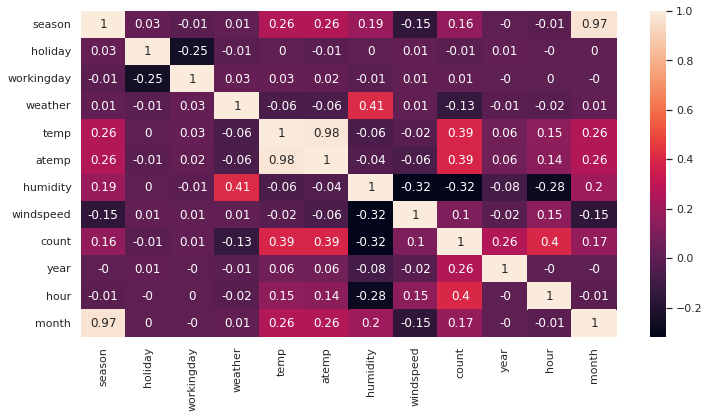

In [ ]:
#Correlation Analysis
corr_table = round(df_train.corr(method = 'pearson'), 2)
corr_table

plt.figure(figsize = (12, 6))
sns.heatmap(corr_table, annot = True)

In [ ]:
#Correlation Analysis
corr_table2 = round(dfTr.corr(method = 'pearson'), 2)
corr_table2.loc[["season","month"]]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16,-0.0,-0.01,0.97
month,0.97,0.00,-0.00,0.01,0.26,0.26,0.20,-0.15,0.09,0.17,0.17,-0.0,-0.01,1.00


In [ ]:
#Correlation Analysis
corr_table2 = round(dfTr.corr(method = 'pearson'), 2)
corr_table2.loc[["temp","atemp"]]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39,0.06,0.15,0.26
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39,0.06,0.14,0.26


Another reason which proves that Season and month are showing same aspect and <br>I will romve season from dataset and use month instead of that

## Data preparation

### Creat Dummies for categorical variables

In [ ]:
weather =pd.get_dummies(df_train['weather'],prefix='weather',drop_first=True)
year = pd.get_dummies(df_train['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df_train['month'],prefix='month',drop_first=True)
season = pd.get_dummies(df_train['season'],prefix='season',drop_first=True)

df_train = pd.concat([df_train, weather,year, month,season], axis=1)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.drop(columns=["weather", "season", "year","month"],inplace=True)

In [ ]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'hour', 'weather_2', 'weather_3', 'weather_4', 'year_2012',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [ ]:
weather =pd.get_dummies(df_test['weather'],prefix='weather',drop_first=True)
year = pd.get_dummies(df_test['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df_test['month'],prefix='month',drop_first=True)
season = pd.get_dummies(df_test['season'],prefix='season',drop_first=True)

df_test = pd.concat([df_test, weather,year, month,season], axis=1)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.drop(columns=["weather", "season", "year","month"],inplace=True)

#### Remove Season and atemp

In [ ]:
df_train2 = dfTr.drop(dropColumn, axis=1)
df_test2 = dfTs.drop(dropColumn[:3], axis=1)
df_test2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,1
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,1
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,19,12
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,20,12
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,21,12
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,22,12


In [ ]:
weather =pd.get_dummies(df_train2['weather'],prefix='weather',drop_first=True)
year = pd.get_dummies(df_train2['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df_train2['month'],prefix='month',drop_first=True)

df_train2 = pd.concat([df_train2, weather,year, month], axis=1)
df_train2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'hour', 'month', 'weather_2',
       'weather_3', 'weather_4', 'year_2012', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [ ]:
weather =pd.get_dummies(df_test2['weather'],prefix='weather',drop_first=True)
year = pd.get_dummies(df_test2['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df_test2['month'],prefix='month',drop_first=True)

df_test2 = pd.concat([df_test2, weather,year, month], axis=1)
df_test2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'hour', 'month', 'weather_2',
       'weather_3', 'weather_4', 'year_2012', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [ ]:
df_train2.drop(columns=["weather", "season", "year","month","atemp"],inplace=True)
df_test2.drop(columns=["weather", "season", "year","month","atemp"],inplace=True)

In [ ]:
df_train2.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'count',
       'hour', 'weather_2', 'weather_3', 'weather_4', 'year_2012', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
df_test2.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'hour',
       'weather_2', 'weather_3', 'weather_4', 'year_2012', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'hour', 'weather_2', 'weather_3', 'weather_4', 'year_2012',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [ ]:
df_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'hour', 'weather_2', 'weather_3', 'weather_4', 'year_2012', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

**df_test** and **df_train** with temp and season<br>
**df_test2** and **df_train2** without temp and season

# Split dataset

In [ ]:
pathSaveCSV = "/content/drive/MyDrive/dataSet/bike-sharing-demand/"

In [ ]:
df_train.to_csv(pathSaveCSV+"df_train.csv",index=False)
df_test.to_csv(pathSaveCSV+"df_test.csv",index=False)

df_train2.to_csv(pathSaveCSV+"df_train2.csv",index=False)
df_test2.to_csv(pathSaveCSV+"df_test2.csv",index=False)

In [ ]:
train, val = train_test_split(df_train, test_size = 0.2, random_state = 1234)
train2, val2 = train_test_split(df_train2, test_size = 0.2, random_state = 1234)

In [ ]:
y_train = train['count']
X_train = train.drop(columns=["count"])
X_train = sm.add_constant(X_train) #adding a constant
X_train.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,holiday,workingday,temp,atemp,humidity,windspeed,hour,weather_2,weather_3,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
1180,1.0,0,0,12.30,14.395,56,16.9979,21,0,0,...,0,0,0,0,0,0,0,0,0,0
8503,1.0,0,0,35.26,39.395,41,15.0013,16,0,0,...,0,1,0,0,0,0,0,0,1,0
910,1.0,0,1,11.48,12.880,56,19.9995,9,0,0,...,0,0,0,0,0,0,0,0,0,0
8801,1.0,0,1,28.70,33.335,84,6.0032,2,0,0,...,0,0,1,0,0,0,0,0,1,0
5958,1.0,0,0,12.30,16.665,70,0.0000,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_val = val['count']
X_val = val.drop(columns=["count"])
X_val = sm.add_constant(X_val) #adding a constant
X_val.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,holiday,workingday,temp,atemp,humidity,windspeed,hour,weather_2,weather_3,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
3730,1.0,0,1,22.14,25.760,81,27.9993,9,1,0,...,0,0,0,1,0,0,0,0,1,0
3675,1.0,0,0,27.06,30.305,83,8.9981,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9557,1.0,0,1,24.60,27.275,88,8.9981,14,0,1,...,0,0,0,0,1,0,0,0,0,1
1493,1.0,0,1,13.94,16.665,76,11.0014,2,0,1,...,0,0,0,0,0,0,0,1,0,0
9771,1.0,0,1,18.86,22.725,36,0.0000,12,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
y_train2 = train2['count']
X_train2 = train2.drop(columns=["count"])
X_train2 = sm.add_constant(X_train2) #adding a constant
X_train2.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,holiday,workingday,temp,humidity,windspeed,hour,weather_2,weather_3,weather_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1180,1.0,0,0,12.30,56,16.9979,21,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8503,1.0,0,0,35.26,41,15.0013,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
910,1.0,0,1,11.48,56,19.9995,9,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8801,1.0,0,1,28.70,84,6.0032,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5958,1.0,0,0,12.30,70,0.0000,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_val2 = val2['count']
X_val2 = val2.drop(columns=["count"])
X_val2 = sm.add_constant(X_val2) #adding a constant
X_val2.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,holiday,workingday,temp,humidity,windspeed,hour,weather_2,weather_3,weather_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
3730,1.0,0,1,22.14,81,27.9993,9,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3675,1.0,0,0,27.06,83,8.9981,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9557,1.0,0,1,24.60,88,8.9981,14,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1493,1.0,0,1,13.94,76,11.0014,2,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9771,1.0,0,1,18.86,36,0.0000,12,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train.to_csv(pathSaveCSV+"X_train.csv",index=False)
y_train.to_csv(pathSaveCSV+"y_train.csv",index=False)

X_val.to_csv(pathSaveCSV+"X_val.csv",index=False)
y_val.to_csv(pathSaveCSV+"y_val.csv",index=False)

In [ ]:
X_train2.to_csv(pathSaveCSV+"X_train2.csv",index=False)
y_train2.to_csv(pathSaveCSV+"y_train2.csv",index=False)

X_val2.to_csv(pathSaveCSV+"X_val2.csv",index=False)
y_val2.to_csv(pathSaveCSV+"y_val2.csv",index=False)

# Build Machine learning Model

## XGBoost Regression

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train.iloc[:,1:]

,holiday,workingday,temp,atemp,humidity,windspeed,hour,weather_2,weather_3,weather_4,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
0,0,0,12.30,14.395,56,16.9979,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,35.26,39.395,41,15.0013,16,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,11.48,12.880,56,19.9995,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,28.70,33.335,84,6.0032,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,12.30,16.665,70,0.0000,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0,1,4.92,9.850,39,0.0000,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8704,0,0,27.88,31.820,54,16.9979,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8705,0,1,16.40,20.455,82,7.0015,6,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8706,0,0,18.04,21.970,33,19.0012,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dtrain = xgb.DMatrix(X_train.iloc[:,1:], label=y_train)
dval = xgb.DMatrix(X_val.iloc[:,1:], label=y_val)

In [ ]:
# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",  # For regression tasks
    "eval_metric": "rmse",  # Root Mean Squared Error
    "max_depth": 15,  # Maximum depth of the trees (you can adjust this)
    "learning_rate": 0.1,  # Learning rate (you can adjust this)
}

# Train the XGBoost model
num_round = 200  # Number of boosting rounds (you can adjust this)
model = xgb.train(params, dtrain, num_round, [(dval, "validation")])

In [ ]:
# Make predictions on the training data
y_train_pred = model.predict(dtrain)
# Post-process the predictions to ensure they are non-negative
y_train_pred_rounded = [max(0, round(pred)) for pred in y_train_pred]

rmse_train = mean_squared_error(y_train, y_train_pred_rounded, squared=False)
r2_train = r2_score(y_train, y_train_pred_rounded)

# Make predictions on the validation data
y_val_pred = model.predict(dval)
# Post-process the predictions to ensure they are non-negative
y_val_pred_rounded = [max(0, round(pred)) for pred in y_val_pred]

rmse_val = mean_squared_error(y_val, y_val_pred_rounded, squared=False)
r2_val = r2_score(y_val, y_val_pred_rounded)

print("Training RMSE: {:.4f}".format(rmse_train))
print("Training R2: {:.4f}".format(r2_train))
print("Validation RMSE: {:.4f}".format(rmse_val))
print("Validation R2: {:.4f}".format(r2_val))

Training RMSE: 1.8618
Training R2: 0.9999
Validation RMSE: 48.5384
Validation R2: 0.9270


Since we are predictiong the count, we use Round and makes all data to Int<br.>

In [ ]:
# Make predictions on the test data
dtest = xgb.DMatrix(X_test)
y_test_pred = model.predict(dtest)

# Post-process the predictions to ensure they are non-negative
y_test_pred_rounded = [max(0, round(pred)) for pred in y_test_pred]

In [ ]:
y_val.iloc[:,0]

0       185
1        75
2       163
3        13
4       326
       ... 
2173    239
2174     61
2175    141
2176    211
2177    129
Name: count, Length: 2178, dtype: int64

In [ ]:
# Save the predictions to a CSV file
predictionsVal = pd.DataFrame({"Prediction": y_val_pred_rounded, "y_real_val":y_val.iloc[:,0]})
predictionsVal

,Prediction,y_real_val
0,189,185
1,74,75
2,67,163
3,2,13
4,284,326
...,...,...
2173,266,239
2174,89,61
2175,146,141
2176,228,211


## MAKE SUBMISSION DATA_ For Kaggle

In [ ]:
testDf = pd.read_csv(path + "test.csv")
testDf.shape

(6493, 9)

In [ ]:
y_test_pred.shape

(6493,)

In [ ]:
testDf.iloc[:,0]

0       2011-01-20 00:00:00
1       2011-01-20 01:00:00
2       2011-01-20 02:00:00
3       2011-01-20 03:00:00
4       2011-01-20 04:00:00
               ...         
6488    2012-12-31 19:00:00
6489    2012-12-31 20:00:00
6490    2012-12-31 21:00:00
6491    2012-12-31 22:00:00
6492    2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: object

In [ ]:
# Create a DataFrame from the two Series
result_df = pd.DataFrame({
    "datetime": testDf.iloc[:, 0],
    "count": y_test_pred_rounded
})
result_df.to_csv(path + "resultsV1.csv", index=False)
result_df

,datetime,count
0,2011-01-20 00:00:00,9
1,2011-01-20 01:00:00,5
2,2011-01-20 02:00:00,1
3,2011-01-20 03:00:00,1
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,192
6489,2012-12-31 20:00:00,147
6490,2012-12-31 21:00:00,105
6491,2012-12-31 22:00:00,83


# Output understanding

In [ ]:
train = pd.read_csv(path+"train.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
result_df[result_df["count"] == 0]

,datetime,count
4,2011-01-20 04:00:00,0
27,2011-01-21 03:00:00,0
28,2011-01-21 04:00:00,0
97,2011-01-24 04:00:00,0
237,2011-01-31 04:00:00,0
285,2011-02-21 05:00:00,0
580,2011-03-25 02:00:00,0
674,2011-03-29 02:00:00,0
675,2011-03-29 03:00:00,0
2607,2011-10-29 04:00:00,0


In [ ]:
train[['date', 'time']] = train['datetime'].str.split(' ', 1, expand=True)

# Extract the hour from the time column and create a new 'hour' column
train['hour'] = pd.to_datetime(train['time']).dt.hour

<ipython-input-76-739122faeef2>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train[['date', 'time']] = train['datetime'].str.split(' ', 1, expand=True)


In [ ]:
np.mean(train[(train["hour"] < 5) & (train["hour"]>1)]["count"])

13.743008314436885

In [ ]:
np.mean(train["count"])

191.57413191254824

In [ ]:
np.mean(train[(train["hour"] < 18) & (train["hour"]>8)]["count"])

267.2387222628627

The negative predictions observed in the model occur primarily during the midnight hours, where the average bike usage is low, typically around 14.<br/> Conversely, during daytime hours, the average bike usage is substantially higher, averaging around 267.<br/> To address the issue of negative predictions, we have post-processed the model's output by rounding all predictions to whole numbers, effectively ensuring that all counts are non-negative.<br/> This adjustment aligns with the characteristics of the data, and while it may introduce some minor deviations, it is a reasonable approach for count predictions in this context